In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv("PreProcessingOutput/Preprocessed_Life_Expectancy.csv")


In [39]:
df.head(10)

,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,1.621762,0.459399,0.791586,0.268824,-1.172958,-0.335570,-0.705861,-0.110384,-0.964715,0.255359,...,0.925806,-0.732952,-0.323445,-0.525248,0.389975,2.813130,2.773279,-0.725401,-0.579931,65.0
1,1.404986,0.459399,0.856072,0.285786,-1.172958,-0.334441,-0.838704,-0.168124,-0.989810,0.274060,...,0.934140,-0.859877,-0.323445,-0.523083,-0.230936,2.881408,2.817902,-0.740050,-0.610570,59.9
2,1.188210,0.459399,0.831890,0.302749,-1.172958,-0.334594,-0.750142,-0.173531,-1.014905,0.292761,...,0.913306,-0.775260,-0.323445,-0.521632,0.352715,2.926927,2.862526,-0.769349,-0.641209,59.9
3,0.971434,0.459399,0.864132,0.328193,-1.172958,-0.332096,-0.617299,0.032045,-1.040000,0.317696,...,1.075815,-0.648335,-0.323445,-0.518723,-0.168315,2.972446,2.929461,-0.803531,-0.671847,59.5
4,0.754658,0.459399,0.888314,0.345155,-1.172958,-0.367862,-0.573018,0.051757,-1.060076,0.342631,...,0.804966,-0.606027,-0.323445,-0.564893,-0.181666,3.040724,2.974085,-0.847480,-0.763764,59.2
5,0.537882,0.459399,0.920557,0.370599,-1.172958,-0.331344,-0.661580,-0.037556,-1.085171,0.373800,...,1.359164,-0.690643,-0.323445,-0.527603,-0.183440,3.086243,3.018708,-0.876779,-0.855681,58.8
6,0.321106,0.459399,0.936678,0.396043,-1.172958,-0.342874,-0.794423,0.038499,-1.110266,0.398734,...,1.450836,-0.817568,-0.323445,-0.535782,-0.231739,3.131762,3.085643,-0.945143,-0.947597,58.6
7,0.104330,0.459399,0.985042,0.421487,-1.167851,-0.358415,-0.750142,-0.071572,-1.135361,0.423669,...,0.996644,-0.775260,-0.323445,-0.541304,-0.186297,3.177281,3.130267,-0.950027,-1.008875,58.1
8,-0.112446,0.459399,1.049528,0.438450,-1.170405,-0.365944,-0.794423,-0.111518,-1.160456,0.442370,...,0.329940,-0.817568,-0.323445,-0.541573,0.257654,3.222800,3.174890,-1.037924,-1.100792,57.5
9,-0.329222,0.459399,1.049528,0.455412,-1.167851,-0.362793,-0.750142,-0.037469,-1.185551,0.461071,...,0.621623,-1.029110,-0.323445,-0.548979,-0.188900,3.268318,3.219514,-1.086755,-1.192709,57.3


In [20]:
Y = df['Life expectancy ']
X = df.drop(['Life expectancy '], axis=1)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [22]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(x_test)


In [24]:
comparison_df = pd.DataFrame({
    "Actual": y_test.values, 
    "Predicted": y_pred
})

print(comparison_df.head())

   Actual  Predicted
0    73.7  67.182926
1    75.9  77.442065
2    74.2  75.496044
3    76.8  77.952910
4    51.9  47.047181


In [25]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [26]:
print(f"R2 Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R2 Score: 0.8241
Mean Absolute Error (MAE): 2.86
Mean Squared Error (MSE): 15.24
Root Mean Squared Error (RMSE): 3.90


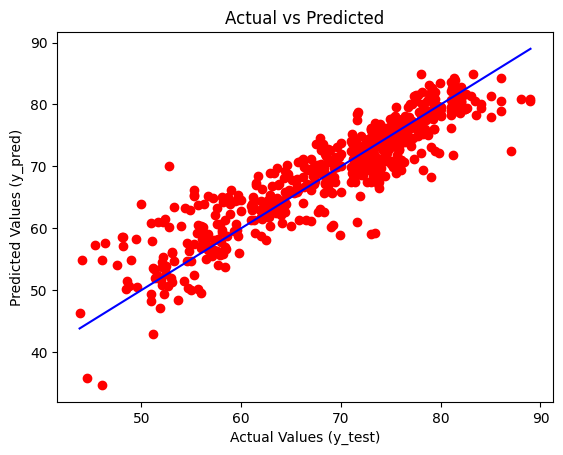

In [27]:
plt.scatter(y_test, y_pred, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.show()

In [28]:
def validate_sample(sample):
    """
    Validates the input sample for correct data types.
    """
    for key, value in sample.items():
        if not isinstance(value, (int, float)):
            raise ValueError(f"Feature '{key}' must be numeric, got {value} (type: {type(value)})")

In [ ]:
def predict_unseen_sample(sample):
    """
    Validates and processes the input sample, then predicts the value.
    """
    try:
        validate_sample(sample)

        sample_df = pd.DataFrame([sample])

        for col in X.columns:
            if col not in sample_df:

                sample_df[col] = X[col].median()

        sample_df = sample_df[X.columns]

        print(f"Processed Sample for Prediction:\n{sample_df}")

        prediction = model.predict(sample_df)
        return prediction[0]
    except Exception as e:
        return f"Error in prediction: {str(e)}"


In [35]:
unseen_sample = {
    'Feature1': 50,
    'Feature2': 30.5,
    'Feature3': 15.0
}
predicted_value = predict_unseen_sample(unseen_sample)
print(f"Predicted Value (Valid Input): {predicted_value}")


Processed Sample for Prediction:
      Year    Status  Adult Mortality  infant deaths   Alcohol  \
0  0.10433  0.459399        -0.167633      -0.231573 -0.113101   

   percentage expenditure  Hepatitis B  Measles       BMI   \
0               -0.338774     0.268323 -0.209553  0.234827   

   under-five deaths      Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0           -0.237104  0.447565       3.700951e-16     0.451679  -0.323445   

        GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0 -0.332451   -0.168706              -0.327668            -0.328053   

   Income composition of resources  Schooling  
0                          0.16822   0.032847  
Predicted Value (Valid Input): 71.316381004296


In [36]:
unseen_sample_partial = {
    'Feature1': 20
}
predicted_value = predict_unseen_sample(unseen_sample_partial)
print(f"Predicted Value (Partial Input): {predicted_value}")

Processed Sample for Prediction:
      Year    Status  Adult Mortality  infant deaths   Alcohol  \
0  0.10433  0.459399        -0.167633      -0.231573 -0.113101   

   percentage expenditure  Hepatitis B  Measles       BMI   \
0               -0.338774     0.268323 -0.209553  0.234827   

   under-five deaths      Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0           -0.237104  0.447565       3.700951e-16     0.451679  -0.323445   

        GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0 -0.332451   -0.168706              -0.327668            -0.328053   

   Income composition of resources  Schooling  
0                          0.16822   0.032847  
Predicted Value (Partial Input): 71.316381004296


In [40]:
unseen_sample_invalid = {
    'Feature1': 'fifty',  # Invalid data type
    'Feature2': 30.5
}
predicted_value = predict_unseen_sample(unseen_sample_invalid)
print(f"Predicted Value (Invalid Input): {predicted_value}")

Predicted Value (Invalid Input): Error in prediction: Feature 'Feature1' must be numeric, got fifty (type: <class 'str'>)


In [ ]:
unseen_sample_extra = {
    'Feature1': 50,
    'Feature2': 30.5,
    'Feature3': 15.0,
    'Extra_Feature': 100 
}
predicted_value = predict_unseen_sample(unseen_sample_extra)
print(f"Predicted Value (Extra Features): {predicted_value}")

Processed Sample for Prediction:
      Year    Status  Adult Mortality  infant deaths   Alcohol  \
0  0.10433  0.459399        -0.167633      -0.231573 -0.113101   

   percentage expenditure  Hepatitis B  Measles       BMI   \
0               -0.338774     0.268323 -0.209553  0.234827   

   under-five deaths      Polio  Total expenditure  Diphtheria    HIV/AIDS  \
0           -0.237104  0.447565       3.700951e-16     0.451679  -0.323445   

        GDP  Population   thinness  1-19 years   thinness 5-9 years  \
0 -0.332451   -0.168706              -0.327668            -0.328053   

   Income composition of resources  Schooling  
0                          0.16822   0.032847  
Predicted Value (Extra Features): 71.316381004296
